% ISOM 3025 Lect4
% Yi Ding
% 2 February 2023

# Lecture 4: Monte Carlo simulation


## Outlines

In this lecture:



## Introducing Monte Carlo simulation

```
The term Monte Carlo simulation was born at the beginning of the Second World War by
J. von Neumann and S. Ulam as part of the Manhattan project at the Los Alamos nuclear
research center. They replaced the parameters of the equations that describe the dynamics
of nuclear explosions with a set of random numbers. The choice of the name Monte Carlo
was due to the uncertainty of the winnings that characterize the famous casino of the
Principality of Monaco.
```

### What is Monte Carlo simulation

Monte Carlo simulation is used to reproduce and numerically solve a problem in which
random variables are also involved, and whose solution by analytical methods is too
complex or impossible. 

In addition, the use of simulation allows you to test the effects
of changes in the input variables or in the output function more easily and with a high
degree of detail. Starting from modeling the processes and generating random variables,
simulations composed of multiple runs capable of obtaining an approximation of the
probability of certain results are performed.

This method has assumed great importance in many scientific and engineering areas,
above all for its ability to deal with complex problems that previously could only be
solved through deterministic simplifications. It is mainly used in three distinct classes
of problems: optimization, numerical integration, and the generation of probability
functions. In this chapter, we will explore various techniques based on Monte Carlo
methods for process simulation. We will first learn the basic concepts and then we will
learn how to apply them to practical cases.




## Monte Carlo components

* Probability Density Functions (PDFs) of the physical system
* Methods for estimating and reducing statistical error
* A uniform random number generator, which allows us to obtain a uniform function distributed in the range between 0-1
* An inversion function, which allows one random variable uniform to be passed to a population variable
* Sampling rules, which allow us to divide the space into specific volumes of interest
* Parallelization and optimization algorithms for efficient implementation with respect to the available computing architecture

The Monte Carlo simulation calculates a series of possible realizations of the phenomenon
in question, along with the weight of the probability of a specific occurrence, while trying
to explore the whole space of the parameters of the phenomenon.
Once this random sample has been calculated, the simulation gathers measurements of
the quantities of interest on this sample. It is well executed if the average value of these
measurements on the system realizations converge to the true value.


## Computing expected value of a random variable

    
![Figure 4.1 – Process of a random generator in GC20](MC_illustration.jpg)
Figure 4.1 – Process of a random generator in GC2020

    
    

## EXAMPLE: Computing $\pi$

![](quartercircle.jpg)
Figure 4.2 – A fraction of the circle in GC2020



If we generate N random numbers inside the square, the number of points that fall in
the circular sector, which we will denote by $M$, divided by the total number of generated
numbers, $N$, we will have to approximate the area of the circular sector and therefore it
will be equal to $\pi/4$. From this, we can derive the following equation:
    $$\pi=\frac{4M}{N}.$$
The greater the number of points generated, the more precise the approximation of $\pi$ will
be.

In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt


The math library provides access to the mathematical functions defined by the
C standard library. The random library implements pseudo-random number
generators for various distributions. The CIT module is based on the Mersenne
Twister algorithm. The numpy library offers additional scientific functions of the
Python language, designed to perform operations on vectors and dimensional
matrices. Finally, the matplotlib library is a Python library for printing highquality
graphics.

Initialization

In [12]:
N = 10000 #  N represents the number of points that we generate, that is, those that we are going to position.
M = 0 #   M will be the points that fall in the circular

In [13]:
#Let's proceed and initialize the vectors that will contain the coordinates of the points that we will generate:
XCircle=[]
YCircle=[]
XSquare=[]
YSquare=[]

In [14]:
# Generate points

for p in range(N):
    x=random.random()
    y=random.random()
    if(x**2+y**2 <= 1):
        M+=1
        XCircle.append(x)
        YCircle.append(y)
    else:
        XSquare.append(x)
        YSquare.append(y)

Now that we've iterated this procedure for the 10,000 points that we have decided to
generate, we can make the estimate of Pi.


In [15]:
Pi=4*M/N
print('N=%d M=%d Pi=%.2f' %(N,M,Pi))


N=10000 M=7816 Pi=3.13


The estimate that we've obtained is acceptable. Usually, we stop at the second
decimal place, so this is okay. Now, let's draw a graph, where we will draw the
generated points. To start, we will generate the points of the circumference arc:


In [16]:
XLin=np.linspace(0,1)
YLin=[]
for x in XLin:
    YLin.append(math.sqrt(1-x**2))
print(len(XLin))  
print(XLin)
help(np.linspace)    


50
[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]
Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supporte

The linspace() function of the numpy library allows us to define an array composed of a series of N numerical elements equally distributed between two
extremes (0,1). This will be the x of the arc of circumference (XLin). On the
other hand, the y numerical elements (YLin) will be obtained from the equation of
the circumference while solving them with respect to y, as follows
$$y=\sqrt{1-x^2}.$$
To calculate the square root, we used the math.sqrt() function.


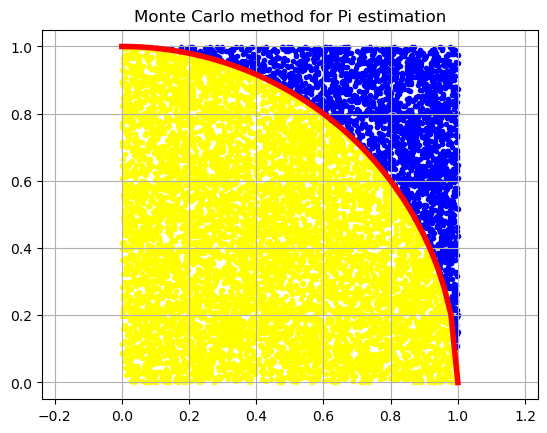

In [52]:
plt.axis ('equal')
plt.grid (which='major')
plt.plot (XLin , YLin, color='red' , linewidth='4')
plt.scatter(XCircle, YCircle, color='yellow', marker
='.')
plt.scatter(XSquare, YSquare, color='blue' , marker
='.')
plt.title ('Monte Carlo method for Pi estimation')
plt.show()

## How many points should we generate?

In principal, large number of replication increases the estimation accuracy. Recall the law of large number in Lecture 2. 

One natural question is how close is the estimator to the true value? How many points should we use in simulation?

The central limit theorem will give us the answer. 




### EXAMPLE: Computing $\pi$, continued

Let us check the distribution of the estimated $\pi$ based on our above procedure. To do so, we perform the above simulation for $K$ times, and document all the estimated $\pi$'s.



In [17]:
K=10000

est_pis=[] # intialize the list of pis

for k in range(K):
    N = 10000 #  N represents the number of points that we generate, that is, those that we are going to position.
    M = 0 #   M will be the points that fall in the circular
    XCircle=[]
    YCircle=[]
    XSquare=[]
    YSquare=[]
    for p in range(N):
        x=random.random()
        y=random.random()
        if(x**2+y**2 <= 1):
            M+=1
            XCircle.append(x)
            YCircle.append(y)
        else:
            XSquare.append(x)
            YSquare.append(y)
            
    Pi=4*M/N
    est_pis.append(Pi)

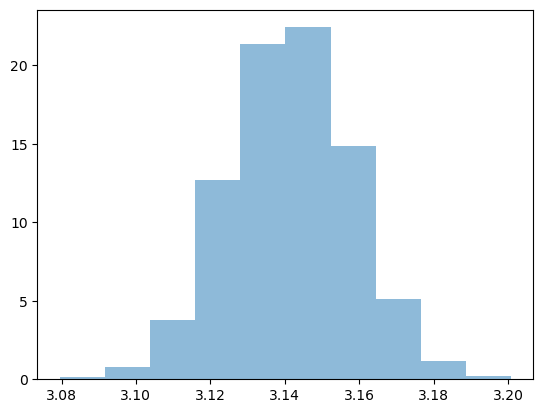

In [54]:
# Compute the histogram

plt.figure()
plt.hist(est_pis, density=True, histtype='stepfilled',alpha=0.5)
plt.show()

Let us superimpose a density function of $N(\pi, 4\pi(1-\pi/4)/N)$. 

3.141592653589793


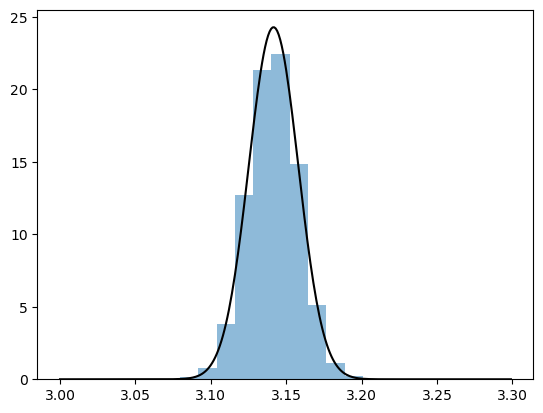

In [55]:
# import required libraries
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
 
# Creating the distribution
data = np.arange(3,3.3,0.001)
pdf = norm.pdf(data , loc = math.pi , scale = math.sqrt(4*math.pi*(1-math.pi/4)/N) )
 
#Visualizing the distribution

print(math.pi)
plt.figure()
plt.hist(est_pis, density=True, histtype='stepfilled',alpha=0.5)
plt.plot(data, pdf , color = 'black')
plt.show()
 

Analysis:
    
 Denote by $z=1$ if the point is in circular; and $z=0$, elsewhere. 
    $z$ is binary with mean $E(z)=\pi/4$. The estimator of $\pi$ is $\hat{\pi}=4(\sum_{i=1}^N z_i/N)$, i.e., the sample mean. 
    
CLT for $\hat{\pi}$: distribuition of $\hat{\pi}$ converges to:  $N( 4E(z), 16var(z)/N)$. 
        
The binary variable $z$ has $E(z)=\pi/4$, $var(z)=(\pi/4)*(1-\pi/4)$.

**Question**: Suppose that if we want our estimator to be around 95\% confident that is  0.001 around the true value. How large should we choose $N$?

$$1.96*\sqrt{4\pi(1-\pi/4)/N}=0.001.$$

Solve that 
$$ N=\pi(1-\pi/4)*(1.96*2/0.001)^2.$$

In [18]:
N_op=math.pi*(1-math.pi/4)*(1.96*2/0.001)**2
print(N_op)

10359897.084897319


**Question: What if we do not know the value $E(z)$ in advance, how to determine $N$?**

  
Indeed, if we know it already, there is no need to use Monte Carlo simulation to estimate the $\pi$, which is the case in most real application. 




Recall from Central Limit Theorem. For a binary variable, $z_i$, i.i.d., $i=1, ...N$. 

Suppose that $E(z_i)=p$, for some $p\in [0,1]$. Then $var(z_i)=p(1-p)$. 

Based on CLT, in distribution $$\sqrt{N}(4\bar{z}-4p)\to N(0,16p(1-p))$$. 

The 95% CI's is therefore $$4\bar{z}\pm 1.96 \times 4\sqrt{p(1-p)/N}.
$$
The (half) length of the CI is $1.96 \times 4\sqrt{p(1-p)/N}$. 

Then if we want the accuracy of the estimation to be, say 0.001, then we make
$P(|4\bar{z}-4 p|<0.001)\geq 0.95$, 

That is,  set the (half) length of the CI to be at most 0.001. 

We then get  $1.96 \times 4\sqrt{p(1-p)/N}\leq 0.001$.

The lowest number of experiment is then 
$$N\geq \big((1.96\times 4/0.001)^2\big)\big(p(1-p)\big). $$
As discussed, we don't know $p$ in advance. Note that we can get the an **upper bound** for $p(1-p)$.

$$p(1-p)\leq 0.5^2.$$
Therefore, we can set
$$N\geq \big((1.96\times 4/0.001)^2\big)\times 0.5^2. $$
Then, the number of experiment $N$ will be sufficient to achieve the desired accuracy, no matter whatever area of the shape is. 

Approximately, we need $(1/\varepsilon)^2$ order of computation to achieve accuracy $\varepsilon$. Alternatively, if we have $N$ number of experiment, the accuracy is about the same order as $(\sqrt{1/N})$. 









### Other applications of Monte Carlo Simulation

* Applying Monte Carlo simulation
* Generating probability distributions
* Numerical optimization
* Project management
* Performing numerical integration


References: Section 4 of GC.